# Simple Linear Regression

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import kagglehub

### define dataset

In [31]:
x = np.linspace(0, 50, 51).reshape(-1, 1)
y = np.linspace(0, 50, 51) + 5

### preprocessing

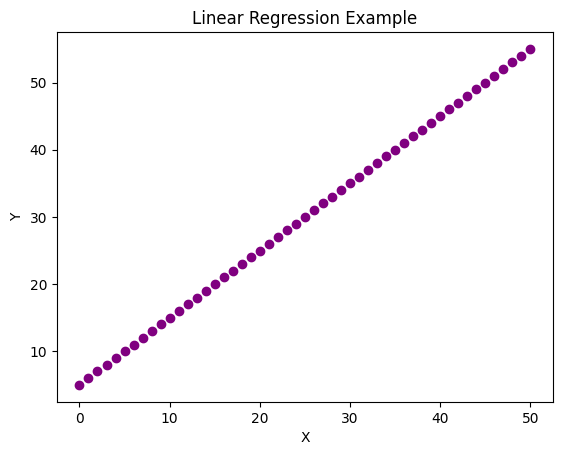

In [32]:
plt.scatter(x, y, color="purple")
plt.title("Linear Regression Example")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [33]:
msk = np.random.rand(len(x)) < 0.8

x_train, x_test = x[msk], x[~msk]
y_train, y_test = y[msk], y[~msk]

x_train.shape, x_test.shape

((42, 1), (9, 1))

### define model

In [37]:
mymodel = LinearRegression()
mymodel.fit(x_train, y_train)

print(f"slope : {mymodel.coef_[0]} | intercept : {mymodel.intercept_}")

slope : 1.0000000000000004 | intercept : 4.999999999999989


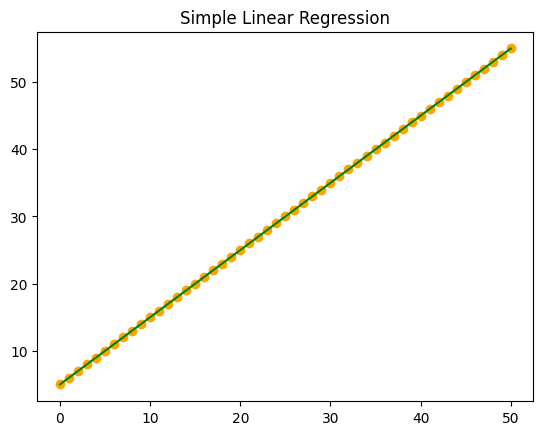

In [38]:
plt.scatter(x, y, color="orange")
plt.plot(x, mymodel.coef_[0] * x + mymodel.intercept_, color="green")
plt.title("Simple Linear Regression")
plt.show()

In [39]:
mymodel.predict([[25]])

array([30.])

In [40]:
mymodel.predict([[11], [1.25], [35]])

array([16.  ,  6.25, 40.  ])

### model evaluation

In [41]:
y_pred_test = mymodel.predict(x_test)

In [42]:
mse = np.mean((y_test - y_pred_test) ** 2)
mae = np.mean(np.absolute(y_test - y_pred_test))
rmse = np.mean((y_test - y_pred_test) ** 2) ** 0.5
rmae = np.mean(np.absolute(y_test - y_pred_test)) ** 0.5
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error : {mse} | Mean Absolute Error : {mae} | Root Mean Squared Error : {rmse} | Root Mean Absolute Error : {rmae} | R2 Score : {r2}")

Mean Squared Error : 6.030403364356179e-29 | Mean Absolute Error : 5.921189464667502e-15 | Root Mean Squared Error : 7.765567181060363e-15 | Root Mean Absolute Error : 7.694926552389894e-08 | R2 Score : 1.0


### define dataset

In [45]:
path = kagglehub.dataset_download("debajyotipodder/co2-emission-by-vehicles")

df = pd.read_csv(path + r"/CO2 Emissions_Canada.csv")
df.head()

100%|██████████| 88.3k/88.3k [00:00<00:00, 741kB/s]

Extracting files...


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

### preprocessing

In [47]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [48]:
df.shape

(7385, 12)

In [49]:
cdf = df[["Engine Size(L)", "Cylinders", "Fuel Consumption Comb (L/100 km)", "CO2 Emissions(g/km)"]]
cdf.head(10)

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


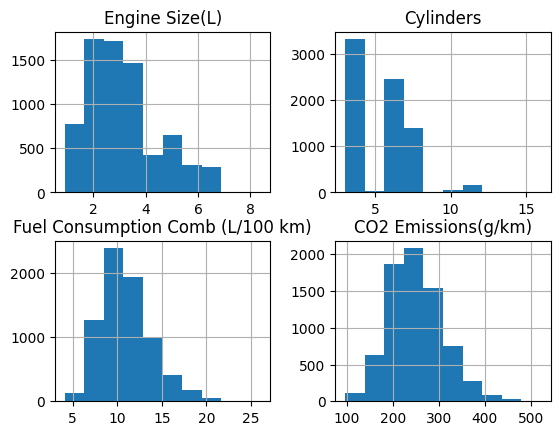

In [50]:
vis = cdf[["Engine Size(L)", "Cylinders", "Fuel Consumption Comb (L/100 km)", "CO2 Emissions(g/km)"]]
vis.hist()
plt.show()

In [51]:
msk = np.random.rand(len(df)) < 0.8

train, test = cdf[msk], cdf[~msk]

train.shape, test.shape

((5904, 4), (1481, 4))

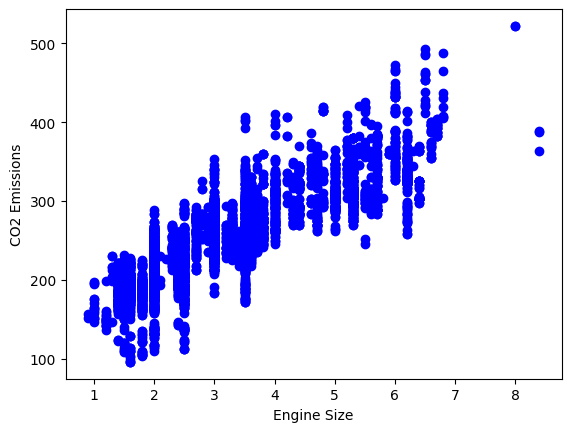

In [52]:
plt.scatter(train["Engine Size(L)"], train["CO2 Emissions(g/km)"], color="blue")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

### define model

In [53]:
mymodel = LinearRegression()

x_train = np.asanyarray(train[["Engine Size(L)"]])
y_train = np.asanyarray(train[["CO2 Emissions(g/km)"]])

mymodel.fit(x_train, y_train)
print(f"slope : {mymodel.coef_[0][0]} | intercept : {mymodel.intercept_[0]}")

slope : 36.720334324790294 | intercept : 134.5691782720145


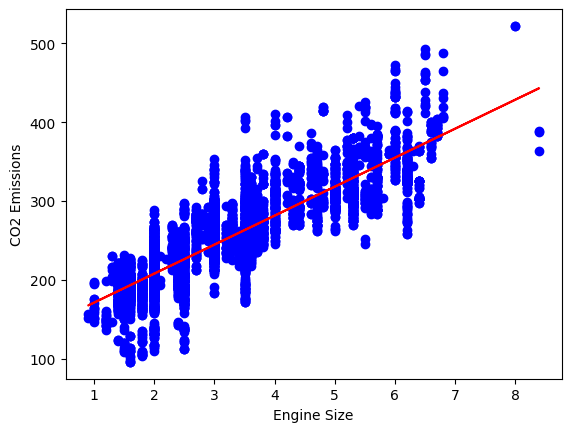

In [54]:
plt.scatter(train["Engine Size(L)"], train["CO2 Emissions(g/km)"], color="blue")
plt.plot(x_train, mymodel.coef_[0][0] * x_train + mymodel.intercept_[0], color="red")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

### model evaluation

In [55]:
x_test = np.asanyarray(test[["Engine Size(L)"]])
y_test = np.asanyarray(test[["CO2 Emissions(g/km)"]])

y_pred_test = mymodel.predict(x_test)

In [56]:
mse = np.mean((y_test - y_pred_test) ** 2)
mae = np.mean(np.absolute(y_test - y_pred_test))
rmse = (np.mean((y_test - y_pred_test) ** 2)) ** 0.5
rmae = (np.mean(np.absolute(y_test - y_pred_test)) ** 0.5)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error : {mse} | Mean Absolute Error : {mae} | Root Mean Squared Error : {rmse} | Root Mean Absolute Error : {rmae} | R2 Score : {r2}")

Mean Squared Error : 923.1463243490117 | Mean Absolute Error : 23.052738475370415 | Root Mean Squared Error : 30.38332312879899 | Root Mean Absolute Error : 4.801326741159199 | R2 Score : 0.726776812255588
